<a href="https://colab.research.google.com/github/dominikklepl/Neural-Networks-Intracranial-hemorrhage-detection/blob/master/06%20Model%20evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation of models
In this notebook, we'll look at the performance of trained models on the testing data. Several performance metrics will be used: accuracy, precision, recall, f1 score. Furthermore we'll plot ROC curves of all models to allow for easy comparison. Finally we'll calculate the area under the ROC curve.
All these metrics wil be calculated for each label +average performance will be computed.

## Import

In [0]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Connect Google Drive

In [25]:
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## Load files

In [0]:
BASE_PATH = "/gdrive/My Drive/ICH prediction/"
TRUTH_DIR = BASE_PATH + "sets/"
PREDICTIONS_DIR = BASE_PATH + "predictions/"
HISTORY_DIR = BASE_PATH + "models/"

#### Load predictions and truth

In [0]:
y_true = pd.read_csv(TRUTH_DIR + "testing.csv",mangle_dupe_cols=True).drop(['ID.1'],axis=1)
y_true2 = pd.read_csv(TRUTH_DIR + "labels.csv")
y_true2 = y_true2.loc[y_true2.set=="test",:].drop(["set"],axis=1)
CNN_ch = pd.read_csv(PREDICTIONS_DIR + 'CNN_channels_preds.csv', index_col='Unnamed: 0')
CNN_ch.drop(CNN_ch.tail(2).index,inplace=True)
CNN_f = pd.read_csv(PREDICTIONS_DIR + 'CNN_full_preds.csv', index_col='Unnamed: 0')
CNN_f.drop(CNN_f.tail(2).index,inplace=True)
TS_ch = pd.read_csv(PREDICTIONS_DIR + 'transfer_channels_preds.csv', index_col='Unnamed: 0')
TS_ch.drop(TS_ch.tail(12).index,inplace=True)
TS_f = pd.read_csv(PREDICTIONS_DIR + 'transfer_full_preds.csv', index_col='Unnamed: 0')
TS_f.drop(TS_f.tail(2).index,inplace=True)
MLP_ch = pd.read_csv(PREDICTIONS_DIR + 'MLP_channels_preds.csv',index_col='Unnamed: 0')
MLP_f = pd.read_csv(PREDICTIONS_DIR + 'MLP_full_preds.csv',index_col='Unnamed: 0')

#### Load training/validation history

In [0]:
history_CNN_ch = pd.read_csv(HISTORY_DIR + "history_CNN_channels.csv")
history_CNN_f = pd.read_csv(HISTORY_DIR + "history_CNN_full.csv")
history_TS_ch = pd.read_csv(HISTORY_DIR + "history_transfer_channels.csv")
history_TS_f = pd.read_csv(HISTORY_DIR + "history_transfer_full.csv")
history_MLP_ch = pd.read_csv(HISTORY_DIR + "history_MLP_channels.csv")
history_MLP_f = pd.read_csv(HISTORY_DIR + "history_MLP_full.csv")

## Calculate all performance metrics
Return them as dataframes

In [0]:
#print metrics and save as txt
def score_lab(y, y_pred, label):
  acc = accuracy_score(y[label], np.round(y_pred[label]))*100
  prec = precision_score(y[label], np.round(y_pred[label]))*100
  rec = recall_score(y[label], np.round(y_pred[label]))*100
  f1 = f1_score(y[label], np.round(y_pred[label]))
  auc = roc_auc_score(y[label], y_pred[label])

  print("\nLabel: {}" .format(label))
  print("Accuracy: %8.3f %%" %(acc))
  print("f1 score: %8.3f" %(f1))
  print("Precision: %8.3f %%" %(prec))
  print("Recall: %8.3f %%" %(rec))
  print("Area under ROC curve: %8.3f" %(auc))

  return [acc, prec, rec, auc]
MLP=False
def get_score(y_pred):
  labels = ["any", "epidural", "intraparenchymal", "intraventricular", "subarachnoid", "subdural"]
  result = np.empty((6,4))
  for lab, i in zip(labels,range(6)):
    if MLP: result[i,:] = score_lab(y_true2, y_pred, lab)
    else: result[i,:] = score_lab(y_true, y_pred, lab)
  result = pd.DataFrame(data=result, index=labels, columns=['Accuracy', "Precision", 'Recall', 'AUC'])
  return result

In [30]:
MLP=False
print("Convolutional neural networks")
print("\nCNN - Human optimization:")
score_CNN_ch = get_score(CNN_ch)
print("\nCNN - Computer optimization:")
score_CNN_f = get_score(CNN_f)
print("\nTransfer learning")
print("\nTS - Human optimization")
score_TS_ch = get_score(TS_ch)
print("\nTS - Computer optimization")
score_TS_f = get_score(TS_f)
print("\nMultilayer perceptron")
print("\nMLP - Human optimization")
MLP = True
score_MLP_ch = get_score(MLP_ch)
print("\nMLP - Computer optimization")
score_MLP_f = get_score(MLP_f)

Convolutional neural networks

CNN - Human optimization:

Label: any
Accuracy:   56.755 %
f1 score:    0.692
Precision:   54.098 %
Recall:   95.978 %
Area under ROC curve:    0.702

Label: epidural
Accuracy:   98.671 %
f1 score:    0.000
Precision:    0.000 %
Recall:    0.000 %
Area under ROC curve:    0.585

Label: intraparenchymal
Accuracy:   83.002 %
f1 score:    0.000
Precision:    0.000 %
Recall:    0.000 %
Area under ROC curve:    0.686

Label: intraventricular
Accuracy:   86.825 %
f1 score:    0.000
Precision:    0.000 %
Recall:    0.000 %
Area under ROC curve:    0.688

Label: subarachnoid
Accuracy:   84.790 %
f1 score:    0.000
Precision:    0.000 %
Recall:    0.000 %
Area under ROC curve:    0.591


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: P


Label: subdural
Accuracy:   77.865 %
f1 score:    0.000
Precision:    0.000 %
Recall:    0.000 %
Area under ROC curve:    0.650

CNN - Computer optimization:

Label: any
Accuracy:   49.397 %
f1 score:    0.000
Precision:    0.000 %
Recall:    0.000 %
Area under ROC curve:    0.516

Label: epidural
Accuracy:   98.671 %
f1 score:    0.000
Precision:    0.000 %
Recall:    0.000 %
Area under ROC curve:    0.443

Label: intraparenchymal
Accuracy:   83.002 %
f1 score:    0.000
Precision:    0.000 %
Recall:    0.000 %
Area under ROC curve:    0.467

Label: intraventricular
Accuracy:   86.825 %
f1 score:    0.000
Precision:    0.000 %
Recall:    0.000 %
Area under ROC curve:    0.514

Label: subarachnoid
Accuracy:   84.790 %
f1 score:    0.000
Precision:    0.000 %
Recall:    0.000 %
Area under ROC curve:    0.509


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F


Label: subdural
Accuracy:   77.865 %
f1 score:    0.000
Precision:    0.000 %
Recall:    0.000 %
Area under ROC curve:    0.475

Transfer learning

TS - Human optimization

Label: any
Accuracy:   81.435 %
f1 score:    0.803
Precision:   86.663 %
Recall:   74.829 %
Area under ROC curve:    0.895

Label: epidural
Accuracy:   98.671 %
f1 score:    0.000
Precision:    0.000 %
Recall:    0.000 %
Area under ROC curve:    0.586

Label: intraparenchymal
Accuracy:   84.852 %
f1 score:    0.420
Precision:   60.158 %
Recall:   32.222 %
Area under ROC curve:    0.835

Label: intraventricular
Accuracy:   84.501 %
f1 score:    0.440
Precision:   41.995 %
Recall:   46.265 %
Area under ROC curve:    0.806

Label: subarachnoid
Accuracy:   84.826 %
f1 score:    0.005
Precision:  100.000 %
Recall:    0.237 %
Area under ROC curve:    0.742


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



Label: subdural
Accuracy:   79.034 %
f1 score:    0.411
Precision:   54.354 %
Recall:   32.984 %
Area under ROC curve:    0.771

TS - Computer optimization

Label: any
Accuracy:   77.798 %
f1 score:    0.781
Precision:   77.883 %
Recall:   78.383 %
Area under ROC curve:    0.859

Label: epidural
Accuracy:   98.671 %
f1 score:    0.000
Precision:    0.000 %
Recall:    0.000 %
Area under ROC curve:    0.608

Label: intraparenchymal
Accuracy:   83.404 %
f1 score:    0.341
Precision:   52.450 %
Recall:   25.311 %
Area under ROC curve:    0.801

Label: intraventricular
Accuracy:   86.990 %
f1 score:    0.479
Precision:   50.698 %
Recall:   45.444 %
Area under ROC curve:    0.852

Label: subarachnoid
Accuracy:   83.455 %
f1 score:    0.263
Precision:   40.796 %
Recall:   19.444 %
Area under ROC curve:    0.739


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



Label: subdural
Accuracy:   77.865 %
f1 score:    0.000
Precision:    0.000 %
Recall:    0.000 %
Area under ROC curve:    0.699

Multilayer perceptron

MLP - Human optimization

Label: any
Accuracy:   66.598 %
f1 score:    0.646
Precision:   61.845 %
Recall:   67.506 %
Area under ROC curve:    0.714

Label: epidural
Accuracy:   98.866 %
f1 score:    0.000
Precision:    0.000 %
Recall:    0.000 %
Area under ROC curve:    0.680

Label: intraparenchymal
Accuracy:   83.093 %
f1 score:    0.118
Precision:   31.429 %
Recall:    7.285 %
Area under ROC curve:    0.682

Label: intraventricular
Accuracy:   89.485 %
f1 score:    0.177
Precision:   34.375 %
Recall:   11.957 %
Area under ROC curve:    0.725

Label: subarachnoid
Accuracy:   86.392 %
f1 score:    0.070
Precision:   23.810 %
Recall:    4.132 %
Area under ROC curve:    0.667

Label: subdural
Accuracy:   74.948 %
f1 score:    0.229
Precision:   36.735 %
Recall:   16.590 %
Area under ROC curve:    0.646

MLP - Computer optimization

Lab

Save to csv

In [31]:
!mkdir /gdrive/My\ Drive/ICH\ prediction/evaluation
!mkdir /gdrive/My\ Drive/ICH\ prediction/evaluation/metrics
METRICS_DIR = BASE_PATH + "evaluation/metrics/"

mkdir: cannot create directory ‘/gdrive/My Drive/ICH prediction/evaluation’: File exists
mkdir: cannot create directory ‘/gdrive/My Drive/ICH prediction/evaluation/metrics’: File exists


In [0]:
score_CNN_ch.to_csv(METRICS_DIR + "metrics_CNN_ch.csv")
score_CNN_f.to_csv(METRICS_DIR + "metrics_CNN_f.csv")
score_TS_ch.to_csv(METRICS_DIR + "metrics_TS_ch.csv")
score_TS_f.to_csv(METRICS_DIR + "metrics_TS_f.csv")
score_MLP_ch.to_csv(METRICS_DIR + "metrics_MLP_ch.csv")
score_MLP_f.to_csv(METRICS_DIR + "metrics_MLP_ch.csv")

## Plot losses

##### CNN

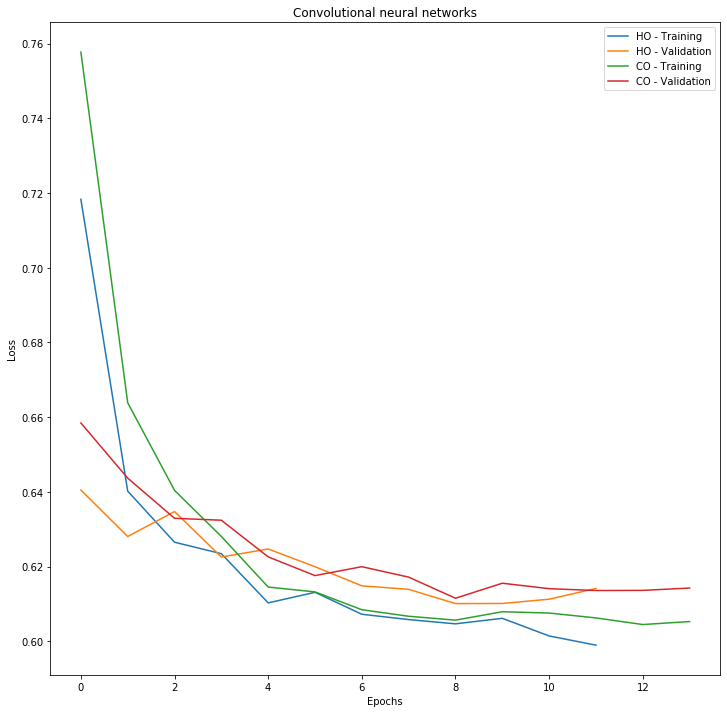

In [33]:
plt.figure(num=1, figsize=(12,12))
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(history_CNN_ch.loss, label="HO - Training")
plt.plot((history_CNN_ch.val_loss), label="HO - Validation")
plt.plot(history_CNN_f.loss, label="CO - Training")
plt.plot((history_CNN_f.val_loss), label="CO - Validation")
plt.legend(loc='best')
plt.title("Convolutional neural networks")
plt.show()

##### Transfer learning

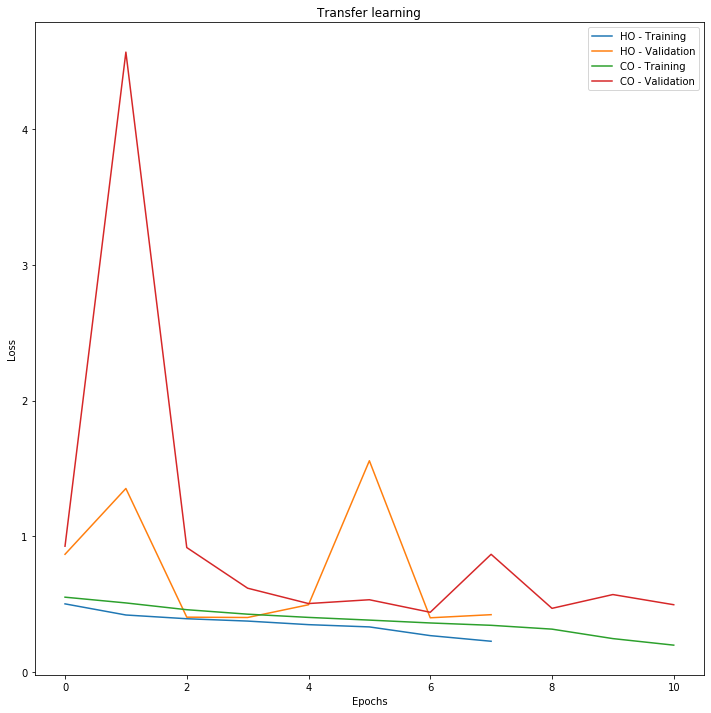

In [34]:
plt.figure(num=1, figsize=(12,12))
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(history_TS_ch.loss, label="HO - Training")
plt.plot((history_TS_ch.val_loss), label="HO - Validation")
plt.plot(history_TS_f.loss, label="CO - Training")
plt.plot((history_TS_f.val_loss), label="CO - Validation")
plt.legend(loc='best')
plt.title("Transfer learning")
plt.show()

##### Multilayer perceptron

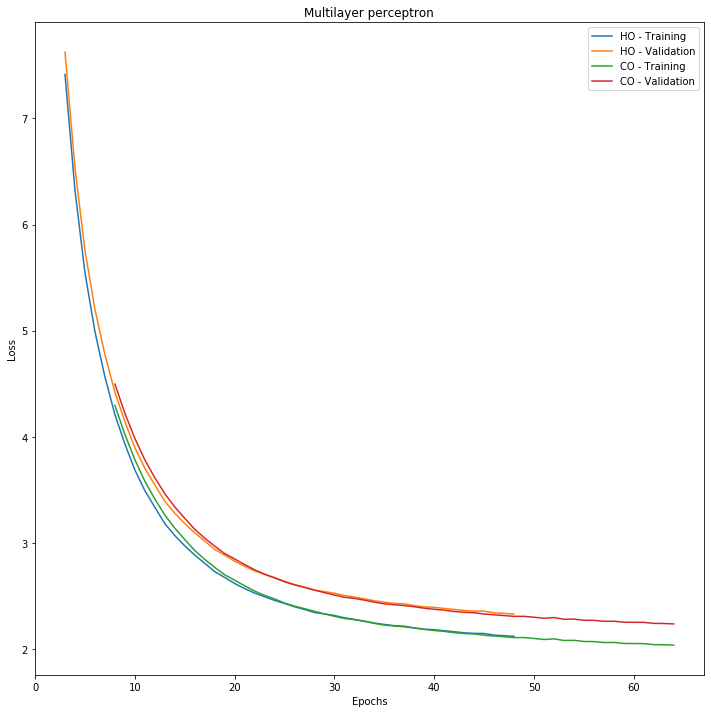

In [35]:
plt.figure(num=1, figsize=(12,12))
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(history_MLP_ch.loss, label="HO - Training")
plt.plot((history_MLP_ch.val_loss), label="HO - Validation")
plt.plot(history_MLP_f.loss, label="CO - Training")
plt.plot((history_MLP_f.val_loss), label="CO - Validation")
plt.legend(loc='best')
plt.title("Multilayer perceptron")
plt.show()

## Plot ROC curve

In [0]:
#plot ROC
def plot_ROC(y_test, y_pred, title):
  fpr_any, tpr_any, _ = roc_curve(y_test['any'], y_pred['any'])
  fpr_ep, tpr_ep, _ = roc_curve(y_test['epidural'], y_pred['epidural'])
  fpr_ip, tpr_ip, _ = roc_curve(y_test['intraparenchymal'], y_pred['intraparenchymal'])
  fpr_iv, tpr_iv, _ = roc_curve(y_test['intraventricular'], y_pred['intraventricular'])
  fpr_sa, tpr_sa, _ = roc_curve(y_test['subarachnoid'], y_pred['subarachnoid'])
  fpr_sd, tpr_sd, _ = roc_curve(y_test['subdural'], y_pred['subdural'])

  plt.figure(num=1, figsize=(12,12))
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_any, tpr_any, label="Any")
  plt.plot(fpr_ep, tpr_ep, label="Epidural")
  plt.plot(fpr_ip, tpr_ip, label="Intraparenchymal")
  plt.plot(fpr_iv, tpr_iv, label="Intraventricular")
  plt.plot(fpr_sa, tpr_sa, label="Subarachnoid")
  plt.plot(fpr_sd, tpr_sd, label="Subdural")
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title(title)
  plt.legend(loc='best')
  plt.show()

##### CNN

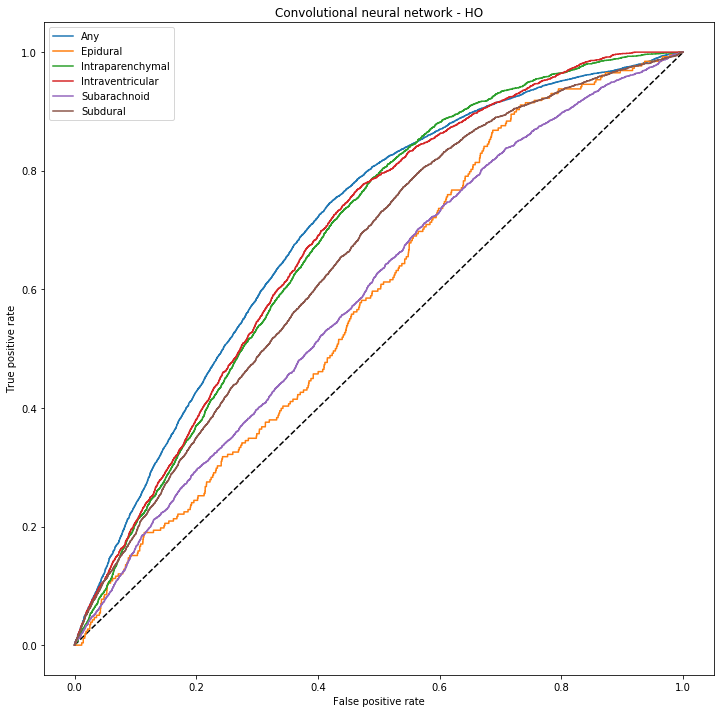

In [37]:
plot_ROC(y_test = y_true, y_pred = CNN_ch, title = "Convolutional neural network - HO")

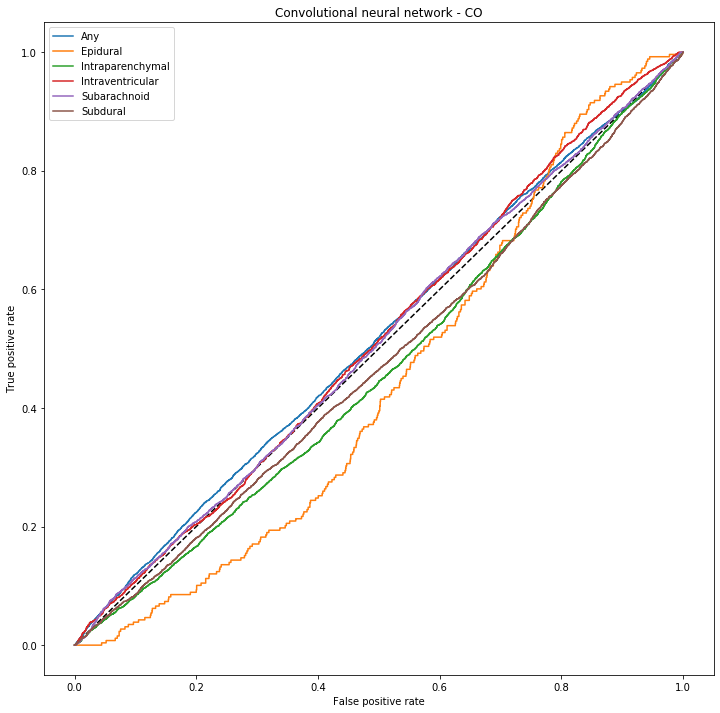

In [38]:
plot_ROC(y_test = y_true, y_pred = CNN_f, title = "Convolutional neural network - CO")

##### Transfer learning

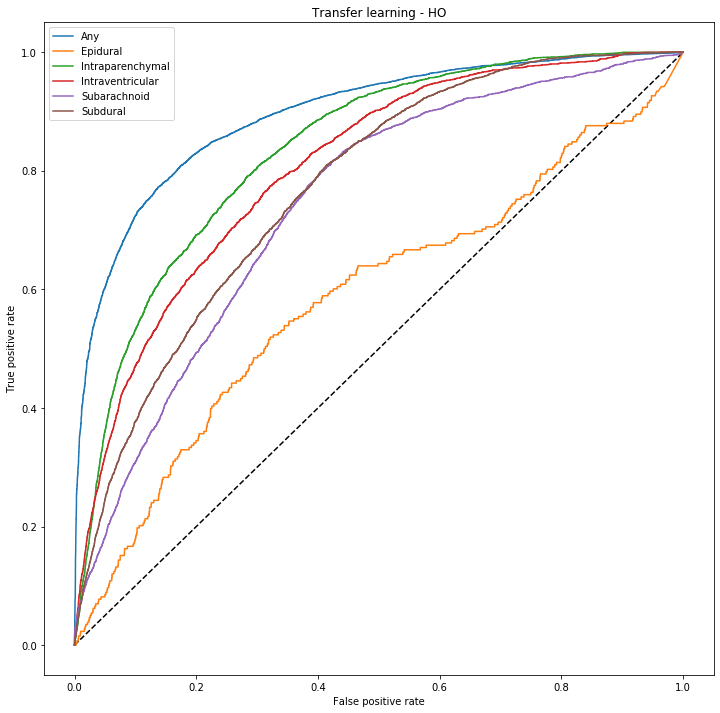

In [39]:
plot_ROC(y_test = y_true, y_pred = TS_ch, title = "Transfer learning - HO")

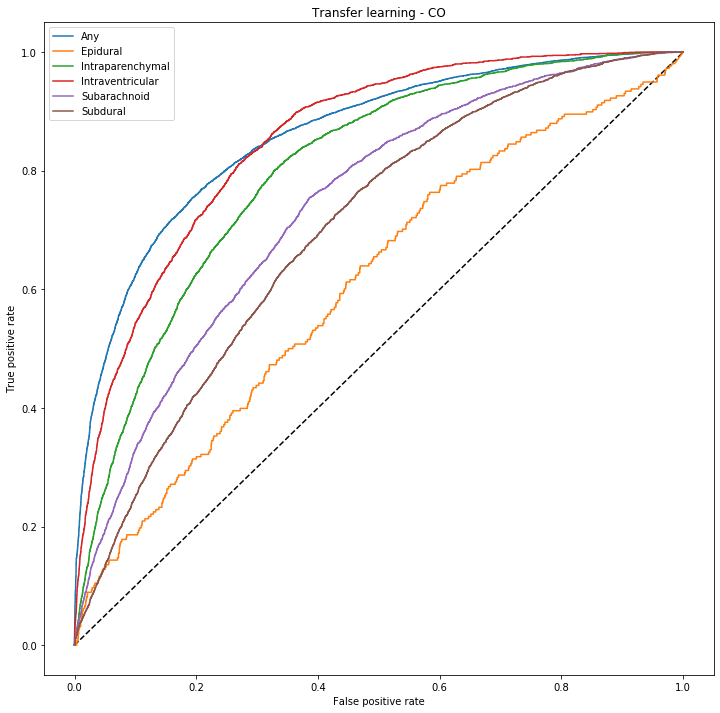

In [40]:
plot_ROC(y_test = y_true, y_pred = TS_f, title = "Transfer learning - CO")

##### Multilayer perceptron

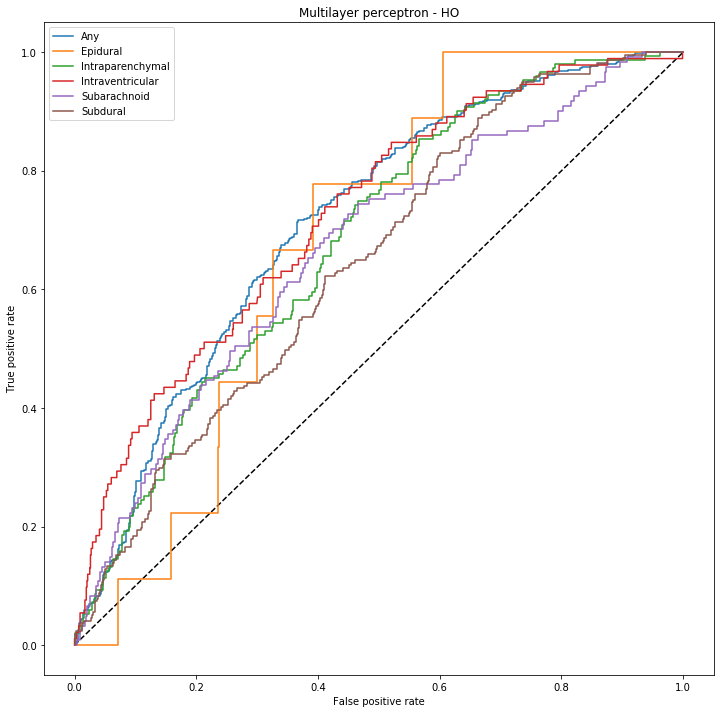

In [41]:
plot_ROC(y_test = y_true2, y_pred = MLP_ch, title = "Multilayer perceptron - HO")

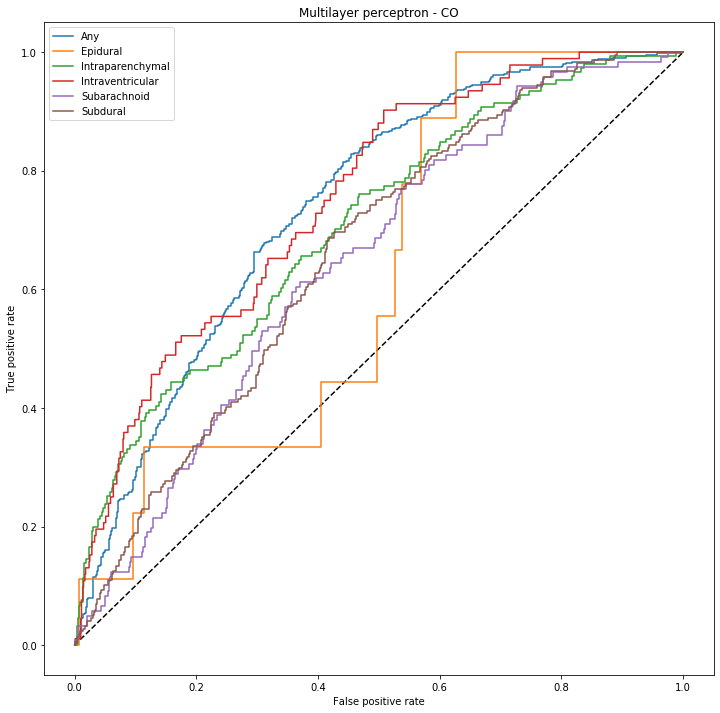

In [42]:
plot_ROC(y_test = y_true2, y_pred = MLP_f, title = "Multilayer perceptron - CO")